<a href="https://www.kaggle.com/code/sourenakhanzadeh/mnist-knowledge-infusion?scriptVersionId=161468054" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import MNIST
from torch.utils.data import DataLoader

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)

    def forward(self, x):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)  # Flatten the tensor
        x = torch.relu(self.fc1(x))
        return x

# Check for GPU availability and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load MNIST dataset
# Load MNIST dataset
mnist_transform = transforms.Compose([transforms.ToTensor()])

mnist_train = MNIST(root='./data', train=True, download=True, transform=mnist_transform)
train_loader = DataLoader(mnist_train, batch_size=32, shuffle=True)

mnist_test = MNIST(root='./data', train=False, download=True, transform=mnist_transform)
test_loader = DataLoader(mnist_test, batch_size=32, shuffle=False)


# Instantiate the CNN model and move it to the device
cnn_model = CNN().to(device)

# Define a loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_model.parameters(), lr=0.001)


100%|██████████| 9912422/9912422 [00:00<00:00, 221236836.40it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 48031599.45it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 66221335.52it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21947613.79it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



# Training the Mnist Dataset (Vanilla)

In [2]:
num_epochs = 10
train_loss_list, test_loss_list = [], []

for epoch in range(num_epochs):
    cnn_model.train()  # Set the model to training mode
    train_loss = 0.0
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    
    train_loss_list.append(train_loss / len(train_loader))

    cnn_model.eval()  # Set the model to evaluation mode
    test_loss = 0.0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = cnn_model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    
    test_loss_list.append(test_loss / len(test_loader))

    print(f'Epoch [{epoch + 1}/{num_epochs}], Train Loss: {train_loss_list[-1]:.4f}, Test Loss: {test_loss_list[-1]:.4f}')


Epoch [1/10], Train Loss: 2.5784, Test Loss: 2.4419
Epoch [2/10], Train Loss: 2.4396, Test Loss: 2.4201
Epoch [3/10], Train Loss: 2.4225, Test Loss: 2.4050
Epoch [4/10], Train Loss: 2.4143, Test Loss: 2.4062
Epoch [5/10], Train Loss: 2.4092, Test Loss: 2.3973
Epoch [6/10], Train Loss: 2.4041, Test Loss: 2.3993
Epoch [7/10], Train Loss: 2.4020, Test Loss: 2.3980
Epoch [8/10], Train Loss: 2.3995, Test Loss: 2.4014
Epoch [9/10], Train Loss: 2.3968, Test Loss: 2.3952
Epoch [10/10], Train Loss: 2.3953, Test Loss: 2.3944


# Plot the Train Loss and Test Loss

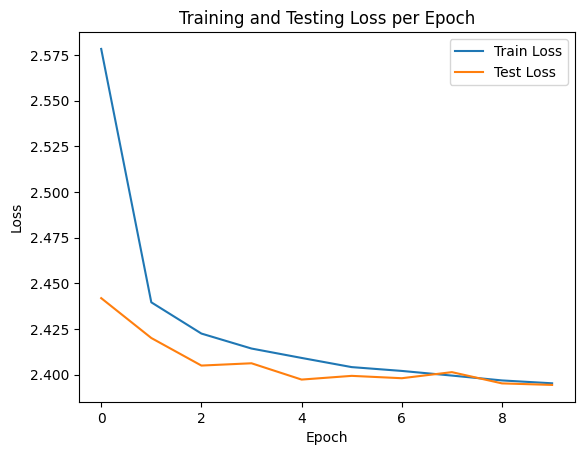

In [3]:
import matplotlib.pyplot as plt

# Plotting the training and testing loss
plt.plot(train_loss_list, label='Train Loss')
plt.plot(test_loss_list, label='Test Loss')
plt.title('Training and Testing Loss per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Predicting the single image

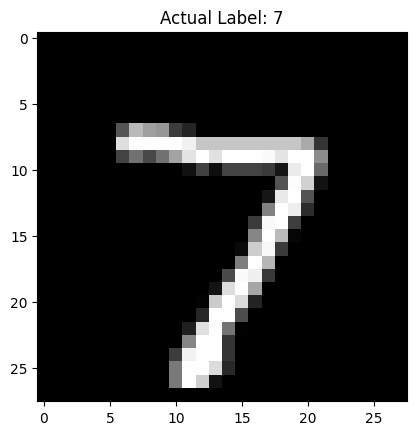

In [4]:
# Get a single image and label from the test set
images, labels = next(iter(test_loader))
image, label = images[0], labels[0]

# Preview the image
plt.imshow(image.squeeze(), cmap='gray')  # Squeeze removes the channel dimension to display the image
plt.title(f'Actual Label: {label.item()}')
plt.show()

# Prediction of a single image

In [5]:
cnn_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    # Move the image to the device and add a batch dimension
    image = image.to(device).unsqueeze(0)
    
    output = cnn_model(image)
    _, predicted = torch.max(output, 1)
    prediction = predicted.item()

print(f'Predicted class: {prediction}')

Predicted class: 0


# Getting the accuracy of the model

In [6]:
# Assuming you have a DataLoader named 'test_loader' for your test dataset
# and a model 'cnn_model' already trained and transferred to the correct device

cnn_model.eval()  # Set the model to evaluation mode
all_predicted_labels = []
all_true_labels = []

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)
        all_predicted_labels.extend(predicted.view_as(labels))
        all_true_labels.extend(labels)

# Convert the lists of tensors to single tensors
all_predicted_labels = torch.stack(all_predicted_labels)
all_true_labels = torch.stack(all_true_labels)

# Calculate the accuracy
accuracy = (all_predicted_labels == all_true_labels).sum().item() / len(all_true_labels)
print(f'Accuracy of the model on the test images: {accuracy * 100:.2f}%')


Accuracy of the model on the test images: 60.37%


In [7]:
# write a confusion matrix for what digit are being confused with what
for i in range(10):
    print(f'Class {i} accuracy: {((all_predicted_labels == i) & (all_true_labels == i)).sum().item() / (all_true_labels == i).sum().item() * 100:.2f}%')

Class 0 accuracy: 95.51%
Class 1 accuracy: 99.82%
Class 2 accuracy: 99.71%
Class 3 accuracy: 99.70%
Class 4 accuracy: 99.80%
Class 5 accuracy: 0.00%
Class 6 accuracy: 99.37%
Class 7 accuracy: 0.00%
Class 8 accuracy: 0.00%
Class 9 accuracy: 0.00%


In [8]:
!pip install torchviz

  Preparing metadata (setup.py) ... - done
  Created wheel for torchviz: filename=torchviz-0.0.2-py3-none-any.whl size=4131 sha256=38b289e1831955c1fa7318fac466c42b0bd06251dd1eb7c4f60624f9fa660d83
  Stored in directory: /root/.cache/pip/wheels/4c/97/88/a02973217949e0db0c9f4346d154085f4725f99c4f15a87094
Successfully built torchviz


In [9]:
!pip install torchsummary

In [10]:
from torchsummary import summary

# Your CNN model must be defined and transferred to the appropriate device before this step
cnn_model.to(device)

# Display the summary
# The input_size parameter should match the input dimension of your model, excluding the batch size
summary(cnn_model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
         MaxPool2d-2           [-1, 16, 14, 14]               0
            Conv2d-3           [-1, 32, 14, 14]           4,640
         MaxPool2d-4             [-1, 32, 7, 7]               0
            Linear-5                  [-1, 128]         200,832
Total params: 205,632
Trainable params: 205,632
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.18
Params size (MB): 0.78
Estimated Total Size (MB): 0.97
----------------------------------------------------------------


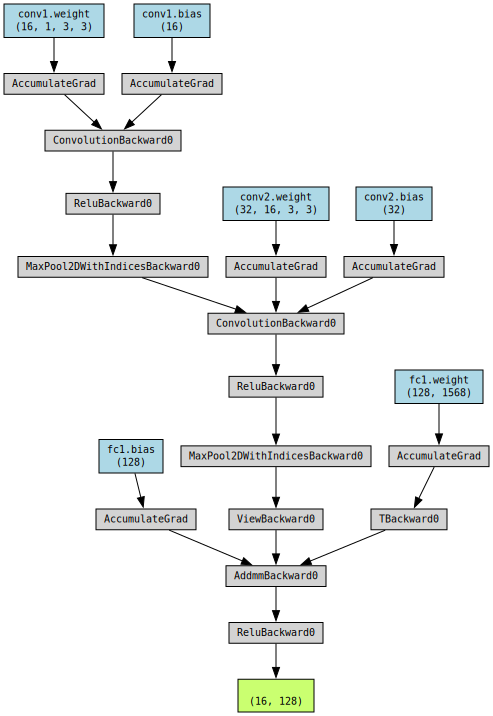

In [11]:
from torchviz import make_dot

# Create a sample input tensor
sample_input = torch.randn(1, 1, 28, 28).to(device)

# Visualize the model
model_vis = make_dot(cnn_model(images), params=dict(cnn_model.named_parameters()))
model_vis.render("cnn_model_Vannilla", format="png")
model_vis

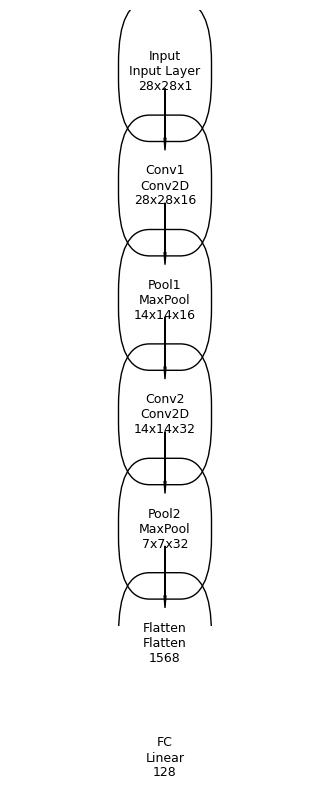

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import FancyBboxPatch, Arrow

def draw_layer(ax, center_x, center_y, width, height, layer_label, is_last_layer):
    # Draw the layer rectangle
    layer_rect = FancyBboxPatch((center_x - width / 2, center_y - height / 2), width, height,
                                boxstyle="round,pad=0.1", ec="black", fill=False)
    ax.add_patch(layer_rect)
    ax.text(center_x, center_y, layer_label, ha='center', va='center', fontsize=9)
    
    # Draw connection line if not the last layer
    if not is_last_layer:
        ax.add_patch(Arrow(center_x, center_y - height, 0, -0.1, width=0.01, color="black"))

def visualize_model_layers_with_connections(layer_info):
    fig, ax = plt.subplots(figsize=(4, 8))  # Adjust the figure size as needed
    num_layers = len(layer_info)
    layer_width = 0.10
    layer_height = 0.6 / num_layers
    current_y = 0.9

    for i, (layer_name, layer_type, layer_dims) in enumerate(layer_info):
        label = f"{layer_name}\n{layer_type}\n{layer_dims}"
        draw_layer(ax, 0.5, current_y, layer_width, layer_height / 3, label, i == num_layers - 1)
        current_y -= layer_height + 0.1

    ax.set_ylim(0, 1)
    ax.set_xlim(0, 1)
    plt.axis('off')
    plt.show()

# Manually specify your layers here (layer name, layer type, output dimensions)
layer_info = [
    ("Input", "Input Layer", "28x28x1"),
    ("Conv1", "Conv2D", "28x28x16"),
    ("Pool1", "MaxPool", "14x14x16"),
    ("Conv2", "Conv2D", "14x14x32"),
    ("Pool2", "MaxPool", "7x7x32"),
    ("Flatten", "Flatten", "1568"),
    ("FC", "Linear", "128"),
    # Add more layers as needed
]

visualize_model_layers_with_connections(layer_info)


In [13]:
!pip install hiddenlayer

In [14]:
import torch.onnx
import torchvision.models as models

# Define or load your model
model = CNN()  # Your CNN model

# Set the model to inference mode
model.eval()

# Create a dummy input for the model. The shape should match your model's input.
dummy_input = torch.randn(1, 1, 28, 28)

# Export the model
torch.onnx.export(model, dummy_input, "model.onnx", verbose=True)

Exported graph: graph(%input.1 : Float(1, 1, 28, 28, strides=[784, 784, 28, 1], requires_grad=0, device=cpu),
      %conv1.weight : Float(16, 1, 3, 3, strides=[9, 9, 3, 1], requires_grad=1, device=cpu),
      %conv1.bias : Float(16, strides=[1], requires_grad=1, device=cpu),
      %conv2.weight : Float(32, 16, 3, 3, strides=[144, 9, 3, 1], requires_grad=1, device=cpu),
      %conv2.bias : Float(32, strides=[1], requires_grad=1, device=cpu),
      %fc1.weight : Float(128, 1568, strides=[1568, 1], requires_grad=1, device=cpu),
      %fc1.bias : Float(128, strides=[1], requires_grad=1, device=cpu)):
  %/conv1/Conv_output_0 : Float(1, 16, 28, 28, strides=[12544, 784, 28, 1], requires_grad=0, device=cpu) = onnx::Conv[dilations=[1, 1], group=1, kernel_shape=[3, 3], pads=[1, 1, 1, 1], strides=[1, 1], onnx_name="/conv1/Conv"](%input.1, %conv1.weight, %conv1.bias), scope: __main__.CNN::/torch.nn.modules.conv.Conv2d::conv1 # /opt/conda/lib/python3.10/site-packages/torch/nn/modules/conv.py:456:0


# Evaluation Plots Functions

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.metrics import precision_recall_curve, average_precision_score


def plot_perc_recall_curve(true_labels, predictions):
    precision, recall, _ = precision_recall_curve(true_labels.cpu(), predictions.cpu())
    avg_precision = average_precision_score(true_labels, predictions)

    plt.figure()
    plt.step(recall, precision, where='post', label=f'Average precision (AP) = {avg_precision:.2f}')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('Precision-Recall Curve')
    plt.legend(loc="lower right")
    plt.show()


def plot_roc_curve_auc(true_labels, predictions):
    fpr, tpr, thresholds = roc_curve(true_labels, predictions)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

def acc_per_rec_f1(true_labels, predictions):
    accuracy = accuracy_score(true_labels.cpu(), predictions.cpu())
    precision = precision_score(true_labels.cpu(), predictions.cpu(), average='macro')
    recall = recall_score(true_labels.cpu(), predictions.cpu(), average='macro')
    f1 = f1_score(true_labels.cpu(), predictions.cpu(), average='macro')

    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")


def plot_confusion_matrix(true_labels, predictions):
    cm = confusion_matrix(true_labels.cpu(), predictions.cpu())
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



# Confusion Matrix for (Vanilla)

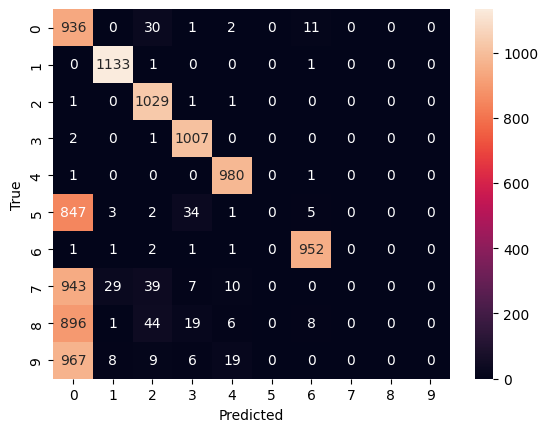

In [16]:
plot_confusion_matrix(all_true_labels, all_predicted_labels)

In [17]:
def get_performance_metrics(true_labels, predictions):
    accuracy = accuracy_score(true_labels.cpu(), predictions.cpu())
    precision = precision_score(true_labels.cpu(), predictions.cpu(), average='macro')
    recall = recall_score(true_labels.cpu(), predictions.cpu(), average='macro')
    f1 = f1_score(true_labels.cpu(), predictions.cpu(), average='macro')
    
    return accuracy, precision, recall, f1


In [18]:
acc_per_rec_f1(all_true_labels, all_predicted_labels)

Accuracy: 0.6037
Precision: 0.4927441443586316
Recall: 0.5939162944610491
F1 Score: 0.5184928931285545


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Shallow Infusion

In [19]:
class MNISTInfused(torch.utils.data.Dataset):
    def __init__(self, mnist_dataset, transform=None):
        self.mnist_dataset = mnist_dataset
        self.transform = transform

    def __len__(self):
        return len(self.mnist_dataset)

    def __getitem__(self, idx):
        image, label = self.mnist_dataset[idx]
        if self.transform:
            image = self.transform(image)
        features = extract_features(image)
        return (image, features), label


class CNNWithShallowInfusion(nn.Module):
    def __init__(self, feature_size):
        super(CNNWithShallowInfusion, self).__init__()
        # Define the CNN layers
        self.conv1 = nn.Conv2d(1, 16, 3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)

        # Define additional layers for the infused features
        self.fc_features = nn.Linear(feature_size, 128)
        self.fc_combined = nn.Linear(128 + 128, 10)

    def forward(self, x, features):
        x = self.pool(torch.relu(self.conv1(x)))
        x = self.pool(torch.relu(self.conv2(x)))
        x = x.view(x.size(0), -1)
        x = torch.relu(self.fc1(x))
        
        features = torch.relu(self.fc_features(features))
        
        # Combine CNN output and shallow features
        combined = torch.cat((x, features), dim=1)
        combined = self.fc_combined(combined)
        return combined


# Check for GPU availability and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [20]:
def extract_features(image):
    # Assuming the input image is a PyTorch tensor of shape (1, 28, 28)
    image = image.squeeze(0)  # Remove channel dimension

    # Feature 1: Density
    density = torch.sum(image) / (28 * 28)  # Normalized density

    # Feature 2: Symmetry
    left_side = image[:, :14]
    right_side = image[:, 14:]
    flipped_right_side = torch.flip(right_side, [1])  # Flip the right side horizontally
    symmetry = torch.sum(torch.abs(left_side - flipped_right_side)) / (14 * 28)  # Normalized symmetry

    # Combine features into a single tensor
    features = torch.tensor([density, symmetry], dtype=torch.float32)
    return features


# Training (Shallow)

In [21]:
from torchvision.transforms import ToTensor

# Instantiate datasets
mnist_train = MNIST(root='./data', train=True, download=False, transform=ToTensor())
mnist_test = MNIST(root='./data', train=False, download=False, transform=ToTensor())

infused_train_dataset = MNISTInfused(mnist_train)
infused_test_dataset = MNISTInfused(mnist_test)

# Create DataLoaders
infused_train_loader = DataLoader(infused_train_dataset, batch_size=32, shuffle=True)
infused_test_loader = DataLoader(infused_test_dataset, batch_size=32, shuffle=False)

# Instantiate the model with the size of the feature vector
feature_size = 2  # Number of features extracted
cnn_infused_model = CNNWithShallowInfusion(feature_size).to(device)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(cnn_infused_model.parameters(), lr=0.001)

# Initialize lists to keep track of loss
train_losses = []
test_losses = []
num_epochs = 10

# Training loop
for epoch in range(num_epochs):
    cnn_infused_model.train()
    train_loss = 0
    for (images, features), labels in infused_train_loader:
        images, features, labels = images.to(device), features.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = cnn_infused_model(images, features)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    train_losses.append(train_loss / len(infused_train_loader))

    cnn_infused_model.eval()
    test_loss = 0
    with torch.no_grad():
        for (images, features), labels in infused_test_loader:
            images, features, labels = images.to(device), features.to(device), labels.to(device)
            outputs = cnn_infused_model(images, features)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
    test_losses.append(test_loss / len(infused_test_loader))

    print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_losses[-1]:.4f}, Test Loss: {test_losses[-1]:.4f}')


Epoch [1/10], Train Loss: 0.1676, Test Loss: 0.0613
Epoch [2/10], Train Loss: 0.0521, Test Loss: 0.0397
Epoch [3/10], Train Loss: 0.0361, Test Loss: 0.0333
Epoch [4/10], Train Loss: 0.0274, Test Loss: 0.0262
Epoch [5/10], Train Loss: 0.0206, Test Loss: 0.0313
Epoch [6/10], Train Loss: 0.0161, Test Loss: 0.0363
Epoch [7/10], Train Loss: 0.0124, Test Loss: 0.0396
Epoch [8/10], Train Loss: 0.0109, Test Loss: 0.0290
Epoch [9/10], Train Loss: 0.0094, Test Loss: 0.0323
Epoch [10/10], Train Loss: 0.0080, Test Loss: 0.0415


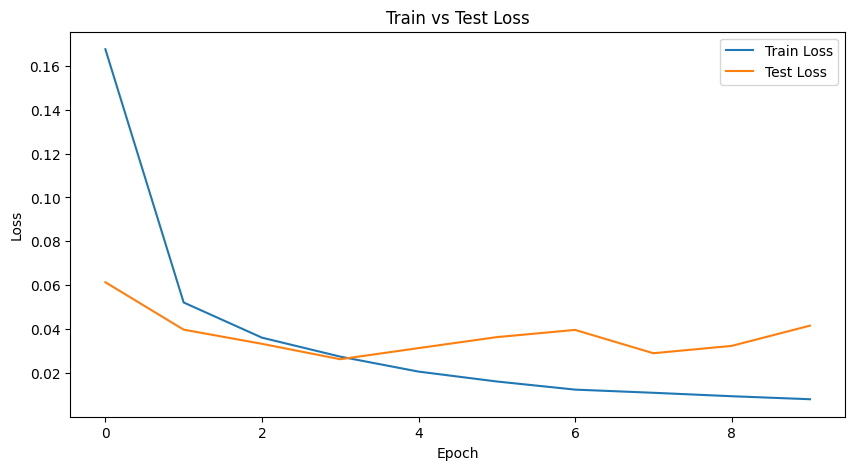

In [22]:
import matplotlib.pyplot as plt

# Plot the training and testing losses
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import accuracy_score
# Calculate accuracy on the entire test set
all_labels = []
all_preds = []
with torch.no_grad():
    for (images, features), labels in infused_test_loader:
        images, features, labels = images.to(device), features.to(device), labels.to(device)
        outputs = cnn_infused_model(images, features)
        _, predicted = torch.max(outputs.data, 1)
        all_labels.extend(labels.cpu().numpy())
        all_preds.extend(predicted.cpu().numpy())
print(f'Accuracy: {accuracy_score(all_labels, all_preds):.4f}')

Accuracy: 0.9898


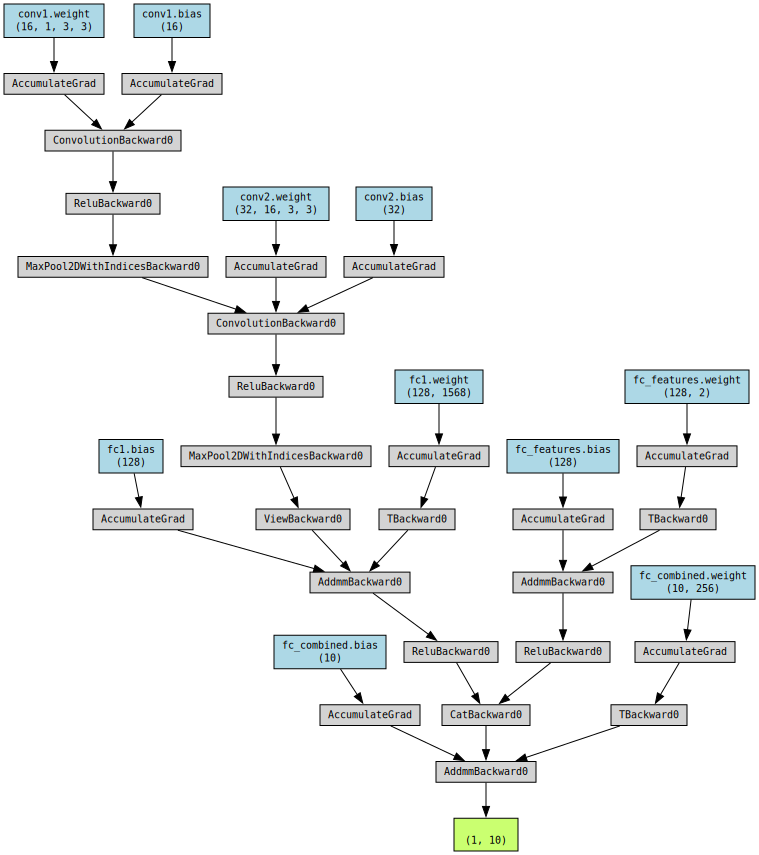

In [24]:
from torchviz import make_dot

# Create a sample input tensor
# sample_input = torch.randn(1, 1, 28, 28).to(device)
# features = extract_features(sample_input).to(device)

(image, features), _ = next(iter(MNISTInfused(MNIST(root='./data', train=True, download=True, transform=ToTensor()))))
image = image.unsqueeze(0).to(device)  # Add batch dimension and send to device
features = features.unsqueeze(0).to(device)  # Add batch dimension and send to device

# Visualize the model
# Ensure the model is in eval mode
output = cnn_infused_model(image, features)
model_vis = make_dot(output, params=dict(cnn_infused_model.named_parameters()))
model_vis.render("cnn_model_shallow", format="png")
model_vis

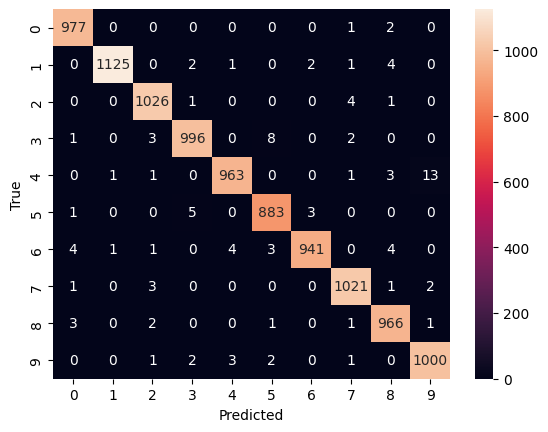

In [25]:
plot_confusion_matrix(torch.tensor(all_labels), torch.tensor(all_preds))

In [26]:
acc_per_rec_f1(torch.tensor(all_labels), torch.tensor(all_preds))

Accuracy: 0.9898
Precision: 0.9896716397169119
Recall: 0.9897326992163927
F1 Score: 0.9896880519329085


In [27]:
# Example model names and their corresponding predictions
model_predictions = {
    "CNN": all_predicted_labels,
    "SHALLOW": torch.tensor(all_preds),  # Replace with your actual predictions
    # Add more models as needed
}

# Dictionary to store metrics
model_metrics = {}

for model_name, predictions in model_predictions.items():
    model_metrics[model_name] = get_performance_metrics(all_true_labels, predictions)

model_metrics

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'CNN': (0.6037, 0.4927441443586316, 0.5939162944610491, 0.5184928931285545),
 'SHALLOW': (0.9898,
  0.9896716397169119,
  0.9897326992163927,
  0.9896880519329085)}

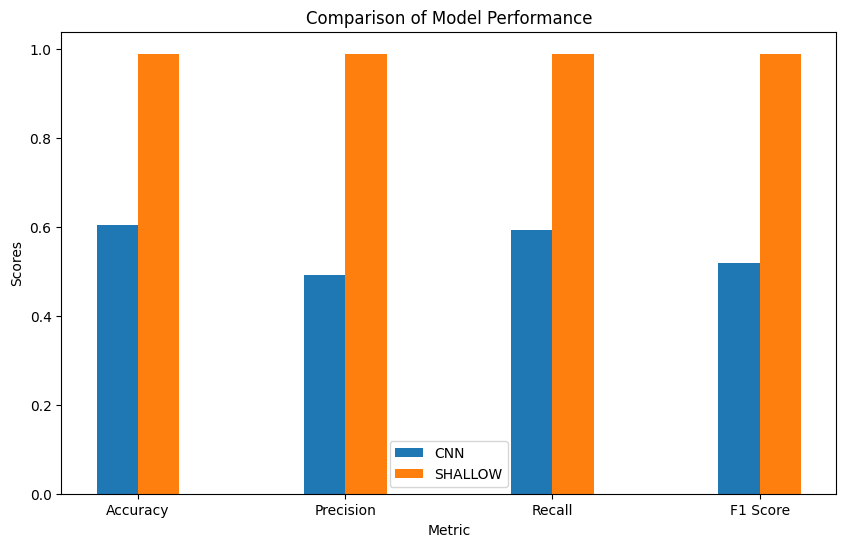

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Metrics to plot
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
num_models = len(model_metrics)
num_metrics = len(metrics)

# Data preparation
data = np.array(list(model_metrics.values()))  # Convert metrics to a numpy array for easier plotting

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
indices = np.arange(num_metrics)

for i, model_name in enumerate(model_metrics.keys()):
    ax.bar(indices + i * bar_width, data[i], bar_width, label=model_name)

ax.set_xlabel('Metric')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Model Performance')
ax.set_xticks(indices + bar_width / num_models)
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

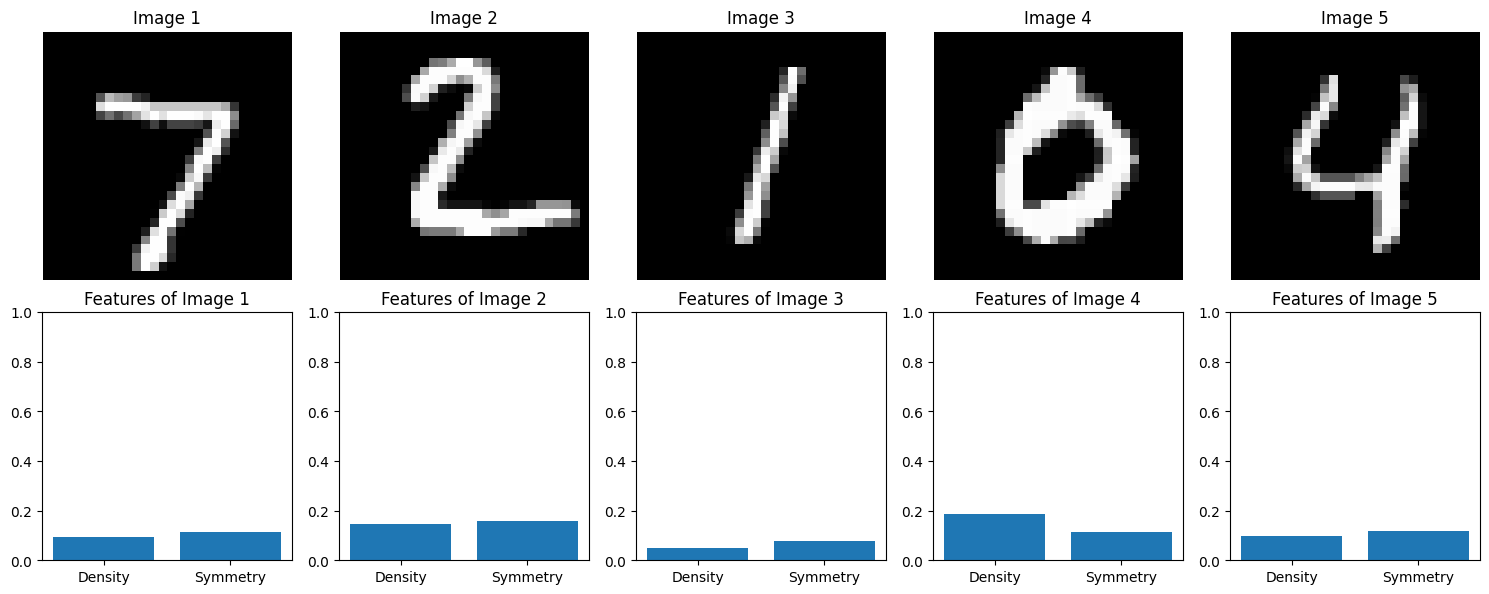

In [29]:
# Retrieve a few images and calculate their features
num_images = 5
densities = []
symmetries = []
images = []

for i in range(num_images):
    image, _ = mnist_test[i]
    images.append(image.squeeze().numpy())
    features = extract_features(image)
    densities.append(features[0].item())
    symmetries.append(features[1].item())

# Visualize the images and their features
fig, axs = plt.subplots(2, num_images, figsize=(15, 6))

for i in range(num_images):
    axs[0, i].imshow(images[i], cmap='gray')
    axs[0, i].set_title(f'Image {i+1}')
    axs[0, i].axis('off')

    axs[1, i].bar(['Density', 'Symmetry'], [densities[i], symmetries[i]])
    axs[1, i].set_ylim(0, 1)
    axs[1, i].set_title(f'Features of Image {i+1}')

plt.tight_layout()
plt.show()